In [10]:
import matplotlib.pyplot as plt
import torch as th
import numpy as np
import pandas as pd

In [2]:
from torchvision.datasets import MNIST

In [4]:
dataset = MNIST(root='/data',download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
type(dataset)

torchvision.datasets.mnist.MNIST

In [7]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /data
    Split: Train

In [8]:
image,label = dataset[0]

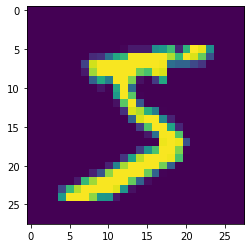

In [11]:
plt.imshow(image)

In [12]:
# Converting images into pytorch tensors

In [14]:
import torchvision.transforms as transform

In [56]:
data = MNIST(root = '/data',train=True,transform = transform.ToTensor())

In [60]:
data[0][0].shape

torch.Size([1, 28, 28])

In [21]:
# Converting Dataset into Validation and train Data

In [61]:
from torch.utils.data import random_split
train_ds,valid_ds = random_split(data,[50000,10000])

In [84]:
from torch.utils.data import TensorDataset

In [ ]:
# Creating Batch 

In [23]:
from torch.utils.data import DataLoader

In [62]:
batch_size = 128
train_lod = DataLoader(train_ds,batch_size,shuffle=True)
val_lod = DataLoader(valid_ds,batch_size)

In [25]:
# Model Building

In [28]:
import torch.nn as nn
import torch.nn.functional as F

In [199]:
class LogReg(nn.Module):

  def __init__(self,inputsize,targetsize):
    super().__init__()
    self.model = nn.Linear(inputsize,targetsize)
    self.cost = []

  def forward(self,input):
    #print('in ;',input.shape)
    input = input.reshape(-1,input.shape[-1]**2)
    #print('SH : ',input.shape)
    return self.model(input)
  
  def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

  def cost_graph(self):
    x = np.linspace(0,len(self.cost),len(self.cost))
    plt.scatter(np.array(x),np.array(self.cost))
    plt.show()

  def fit(self,input,val_load,epoch,lr_rate=0.01,batch_size=128):

    train_lod = DataLoader(input,batch_size,shuffle=True)
    valid_lod = DataLoader(val_load,batch_size)

    self.opt = th.optim.SGD(self.model.parameters(),lr = lr_rate)
    
    for i in range(epoch):
      for tx,ty in train_lod:
        pred = F.softmax(self.forward(tx),dim=1)#,dim=1)
        loss = F.cross_entropy(pred,ty) # Logirithmic Loss Function
        self.cost.append(loss)
        loss.backward()
        self.opt.step()
        self.opt.zero_grad()

      for valx,valy in valid_lod:
        pred2 = F.softmax(self.forward(valx),dim=1)
        loss2 = F.cross_entropy(pred2,valy)

      print('Epoch [{}], val_loss: {}, train_loss {}'.format(i,loss2,loss))
    


In [200]:
logr = LogReg(train_ds[0][0].shape[1]**2,10)

In [208]:
logr.fit(train_ds,valid_ds,10,lr_rate=0.01)

Epoch [0], val_loss: 1.6919045448303223, train_loss 1.8013389110565186
Epoch [1], val_loss: 1.6870441436767578, train_loss 1.8040310144424438
Epoch [2], val_loss: 1.682837724685669, train_loss 1.7009365558624268
Epoch [3], val_loss: 1.6788898706436157, train_loss 1.6614700555801392
Epoch [4], val_loss: 1.6745388507843018, train_loss 1.744748830795288
Epoch [5], val_loss: 1.6698261499404907, train_loss 1.6614835262298584
Epoch [6], val_loss: 1.664686679840088, train_loss 1.742863416671753
Epoch [7], val_loss: 1.6577274799346924, train_loss 1.7232158184051514
Epoch [8], val_loss: 1.6471734046936035, train_loss 1.65972101688385
Epoch [9], val_loss: 1.6325109004974365, train_loss 1.6667295694351196


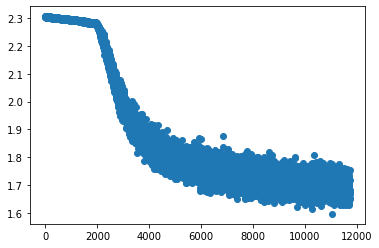

In [209]:
logr.cost_graph()

In [184]:
train_ds[0][0].shape[1]

28

In [185]:
train_ds[0][0].shape[1]**2

784

In [59]:
data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /data
    Split: Train
    StandardTransform
Transform: ToTensor()